In [5]:
import pandas as pd
import seaborn as sns

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

The line below calls the package manager for Python pip and installs a package. We only want to do this once.

The first time you run this notebook please uncomment this line and then comment it again to avoid unneccessary installs and checks. You could also use anaconda or pip from the command line to permanently install the package.

In [2]:
!pip install aequitas

In [3]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

In [6]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")

#### Task 1: Check the contents of the data file in terms of both, attributes-values and number of rows

In [7]:
# Your code for task 1
print(df.head(10))

   entity_id  score  label_value              race     sex          age_cat
0          1    0.0            0             Other    Male  Greater than 45
1          3    0.0            1  African-American    Male          25 - 45
2          4    0.0            1  African-American    Male     Less than 25
3          5    1.0            0  African-American    Male     Less than 25
4          6    0.0            0             Other    Male          25 - 45
5          7    0.0            0             Other    Male          25 - 45
6          8    1.0            1         Caucasian    Male          25 - 45
7          9    0.0            0             Other    Male          25 - 45
8         10    0.0            0         Caucasian  Female          25 - 45
9         13    0.0            1         Caucasian    Male     Less than 25


In [8]:
# Your code for task 1
df.shape

(7214, 6)

In [9]:
aq_palette = sns.diverging_palette(225, 35, n=2)

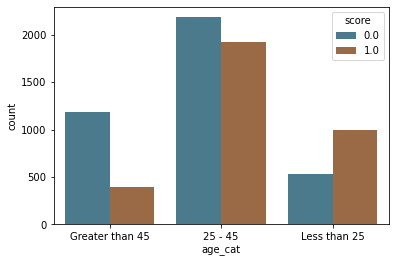

In [10]:
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

In [11]:
score_counts_by_age = df.groupby(['age_cat', 'score']).size().reset_index(name='count')

# Print the counts
print(score_counts_by_age)

           age_cat  score  count
0          25 - 45    0.0   2185
1          25 - 45    1.0   1924
2  Greater than 45    0.0   1182
3  Greater than 45    1.0    394
4     Less than 25    0.0    530
5     Less than 25    1.0    999


#### Task 2: Study the histogram as depicted above and try to interpret the histogram. What is the intention of the data scientist in this case? Subsequently, check the distributions for the same attribute, this time, however, in relation to what has really happened and state your observations by also explaining an indication of a potential bias in the model.

**Your answer for task 2 in this cell:**

The data scientist aims to guarantee fair treatment for each model. The visualizations provide insights into distinct scores associated with various age groups and illustrate how scores are distributed across different age ranges. The data scientist examines the scores obtained in correlation with diverse outcomes for each age group. Additionally, the goal is to identify any disparities in the assignment of scores, particularly among specific age groups that may receive higher or lower scores.


In [9]:
# Your code for task 2



#### Task 3: Repeat the previous explorations. this time, however, for the other two attributes: race and gender. Susequently, interpret  the results and explain any indication of a potential bias in the model.

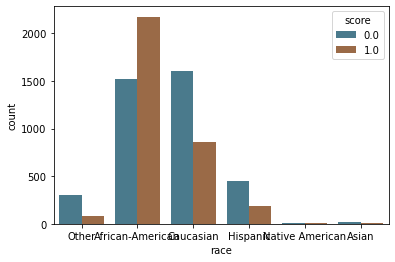

In [12]:
# Your code for task3
import aequitas.plot as ap
race = sns.countplot(x="race", hue="score", data=df, palette=aq_palette)

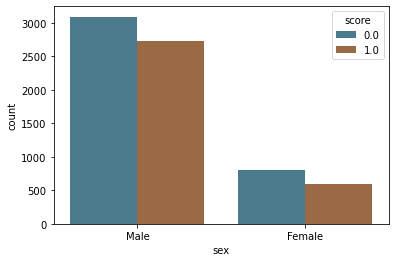

In [13]:
# Your code for task 3
gender = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

**Your answer for task 3 in this cell: **

In [15]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [16]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [17]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3317,race,African-American,2174,1522,805,532,990,1369,1901,1795,3696,7214
1,0,binary 0/1,3317,race,Asian,8,24,2,3,21,6,9,23,32,7214
2,0,binary 0/1,3317,race,Caucasian,854,1600,349,461,1139,505,966,1488,2454,7214
3,0,binary 0/1,3317,race,Hispanic,190,447,87,129,318,103,232,405,637,7214
4,0,binary 0/1,3317,race,Native American,12,6,3,1,5,9,10,8,18,7214
5,0,binary 0/1,3317,race,Other,79,298,36,90,208,43,133,244,377,7214
6,0,binary 0/1,3317,sex,Female,591,804,288,195,609,303,498,897,1395,7214
7,0,binary 0/1,3317,sex,Male,2726,3093,994,1021,2072,1732,2753,3066,5819,7214
8,0,binary 0/1,3317,age_cat,25 - 45,1924,2185,741,706,1479,1183,1889,2220,4109,7214
9,0,binary 0/1,3317,age_cat,Greater than 45,394,1182,181,285,897,213,498,1078,1576,7214


In [18]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


#### Task 4: Study the two tables above with the metrics and suggest those metrics, which may further indicate bias by constrasting groups for the attribute "race" and "age_cat". As a guidance for the selected metrics, you should consider the model and its application as being a "punitive example" rather than an "assistive" one. Justify your answer regarding indicative bias. You should also give the definition for each selected metric.

**Your answer for task 4 in this cell:**

When we look at different groups based on race and age categories, it helps us spot potential biases in the model, especially when considering negative consequences. To understand the differences between demographic groups, we can use metrics like False Discovery Rate (FDR), False Negative Rate (FNR), False Positive Rate (FPR), and Positive Predictive Rate (PPR). An increase in FDR indicates a higher proportion of falsely identified cases among those identified as positive, potentially favoring certain groups over others. An increase in FNR shows a higher rate of missing positive cases among specific groups, suggesting potential bias due to overlooking important instances. A higher FPR indicates a large number of incorrect positive predictions in certain groups compared to actual negatives, favoring other groups. Differences in PPR among demographic groups suggest biased predictions, as some groups experience a higher rate of accurate positive predictions than others. By examining metrics like FDR, FNR, FPR, and PPR across race and age categories, we can uncover disparities that might lead to unfair punitive actions by the model.

#### Task 5: In the following, fill in the missing pieces of code to the disparities among all possible groups and for all of the above metrics. Disparities are calculated as a ratio of a metric for a group of interest compared to a base group. In our case, you should set the follwoing groups as base rate: Caucasian / Male /  Age 25-45.

In [19]:
b = Bias()

In [20]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df,
                                        ref_groups_dict={'race': 'Caucasian', 'sex': 'Male', 'age_cat': '25 - 45'},
                                        alpha=0.05, check_significance=True,
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000

In [21]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,race,African-American,0.906085,0.586416,1.213154,1.912093,0.913728,2.545667,1.690224,1.064904,0.720526,1.377549,True,True,False,True,True,False,True,True,True,False,False,True
1,race,Asian,0.611748,0.698482,0.433839,0.370749,1.229148,0.009368,0.718384,1.268317,1.192808,1.275248,False,False,False,False,False,False,False,False,False,False,False,False
2,race,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
3,race,Hispanic,1.120464,1.165140,1.001616,0.915887,0.999346,0.222482,0.857099,0.916748,1.025773,0.849249,False,True,False,False,False,False,False,True,True,False,False,False
4,race,Native American,0.611748,0.209544,0.578453,1.598854,1.170618,0.014052,1.915691,1.268317,0.816506,1.721584,False,True,False,False,False,False,False,True,True,False,False,False
5,race,Other,1.115085,1.417970,1.048203,0.629057,0.980490,0.092506,0.602147,0.920466,1.113660,0.618447,False,True,False,False,False,False,False,True,True,False,False,False
6,sex,Female,1.336425,1.055810,0.734738,0.990343,1.130710,0.216801,0.904348,0.806925,1.004633,0.967101,True,True,True,True,True,True,True,True,True,True,True,True
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,age_cat,Greater than 45,1.192804,1.531238,0.746232,0.503031,1.121136,0.204782,0.533914,0.879232,1.248989,0.682963,True,True,True,True,True,True,True,True,True,True,True,True


In [22]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

#### Task 6: Having observed the code in the cell above, which values for which disparities are highly likely to indicate bias in the disparity table above?

**Your answer for task 6 in this cell:**

The table shows a potential baises in the model. The FDR and FNR disparities has a value greater 1 in some specific demographic groups with values 'Caucasian','Male' and 'Age 25-45'. The FPR has a value which is less than 1 which shows some biases among some groups.